In [2]:
from holisticai.datasets import load_dataset
from holisticai.explainability.metrics import surrogate as surrogate_metrics

dataset = load_dataset('clinical_records')
dataset

{"dtype":"Dataset","attributes":{"Instances":299,"Features":["X , y , p_attrs"]},"metadata":null}

In [3]:
from sklearn.cluster import KMeans

k = 4 
inertias = []

X = dataset['X']

model = KMeans(n_clusters = k)   
model.fit(X)
model.inertia_

feature_names = list(X.columns)
labels = model.predict(X)

# Surrogate-Based Metrics

In [4]:
from holisticai.utils import ClusteringSurrogate

surrogate = ClusteringSurrogate(X, labels, model_type="tree", random_state=42)
y_surrogate = surrogate.predict(X)

In [5]:
from holisticai.explainability.metrics import surrogate_accuracy_score
# Calculate the accuracy of the surrogate model

surrogate_accuracy_score(labels, y_surrogate)

1.0

In [6]:
from holisticai.explainability.metrics import surrogate_features_stability
# Calculate the stability of the features using the surrogate model. Higher values indicate more stable features.

surrogate_features_stability(X, labels, surrogate, num_bootstraps=5)

0.4371428571428571

In [7]:
from holisticai.explainability.metrics import surrogate_feature_importances_stability
# Calculate the stability of the feature importances using the surrogate model. Higher values indicate more stable feature importances.

surrogate_feature_importances_stability(X, labels, surrogate, num_bootstraps=5)

0.9974791259959583

In [8]:
from holisticai.explainability.metrics import spread_divergence
# Calculate the spread of the feature importances using the surrogate model. Lower values indicate more concentrated feature importances amd more interpretable surrogate models.

spread_divergence(surrogate.feature_importances_)

0.14252728709513884

# Tree-Based Metrics

In [9]:
from holisticai.explainability.metrics.tree import tree_number_of_rules
# Calculate the number of rules in the surrogate model. Lower values indicate more interpretable surrogate models.

tree_number_of_rules(surrogate)

6

In [10]:
from holisticai.explainability.metrics.tree import tree_number_of_features
# Calculate the number of features in the surrogate model. Lower values indicate more interpretable surrogate models.

tree_number_of_features(surrogate)

2

In [11]:
from holisticai.explainability.metrics.tree import tree_depth_variance
# Calculate the variance of the depth of the surrogate model. Lower values indicate more interpretable surrogate models.

tree_depth_variance(surrogate)

np.float64(1.4722222222222223)

In [12]:
from holisticai.explainability.metrics.tree import weighted_average_depth
# Calculate the weighted average depth of the surrogate model. Lower values indicate more interpretable surrogate models.

weighted_average_depth(surrogate)

np.float64(2.2928176795580115)

In [13]:
from holisticai.explainability.metrics.tree import weighted_average_explainability_score
# Calculate the weighted average explainability score of the surrogate model. Lower values indicate more interpretable surrogate models.

weighted_average_explainability_score(surrogate)

np.float64(2.0)

In [14]:
from holisticai.explainability.metrics.tree import weighted_tree_gini
# Calculate the Gini impurity of the surrogate model. Lower values indicate more interpretable surrogate models.

weighted_tree_gini(surrogate)

np.float64(0.9960911690193458)

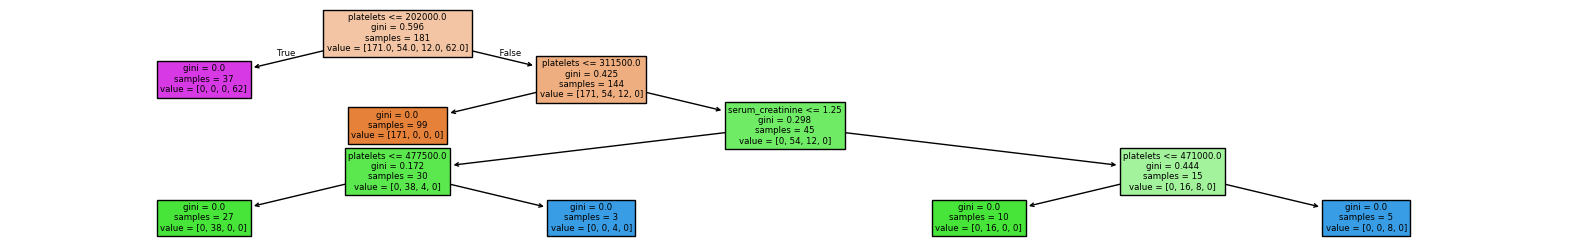

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, feature_names=feature_names, filled=True)

In [16]:
from holisticai.explainability.metrics.surrogate import clustering_surrogate_explainability_metrics

metrics, surrogate = clustering_surrogate_explainability_metrics(X, labels=labels, surrogate_type='tree', metric_type="all", return_surrogate_model=True)
metrics

,Value,Reference
Surrogate Accuracy,1.000000,1.0
Features Stability,0.466667,1.0
Feature Importances Stability,0.999716,1.0
Spread Divergence,0.142527,0.0
Number of Features,2.000000,1.0
Number of Rules,6.000000,1.0
Tree Depth Variance,1.472222,0.0
Weighted Average Explainability Score,2.000000,0.0
Weighted Average Depth,2.292818,0.0
Weighted Gini Index,0.996091,0.0


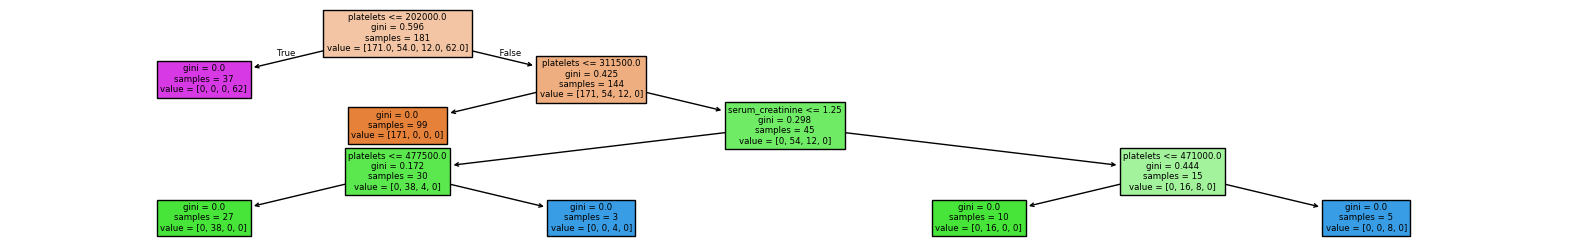

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, feature_names=feature_names, filled=True)

In [18]:
from sklearn.cluster import KMeans
from holisticai.utils import concatenate_metrics

results = {}
for k in range(4,8):
    X = dataset['X']

    model = KMeans(n_clusters = k)   
    model.fit(X)
    model.inertia_

    feature_names = list(X.columns)
    labels = model.predict(X)

    results[f"KMeans_k_{k}"] = clustering_surrogate_explainability_metrics(X, labels=labels, surrogate_type='tree', metric_type="all")

concatenate_metrics(results)

,KMeans_k_4,KMeans_k_5,KMeans_k_6,KMeans_k_7,Reference
Surrogate Accuracy,1.000000,0.996656,0.996656,0.989967,1.0
Features Stability,0.466667,0.480000,0.244048,0.522857,1.0
Feature Importances Stability,0.999301,0.998479,0.999314,0.997154,1.0
Spread Divergence,0.142527,0.152007,0.155359,0.192254,0.0
Number of Features,2.000000,2.000000,4.000000,6.000000,1.0
Number of Rules,6.000000,6.000000,8.000000,13.000000,1.0
Tree Depth Variance,1.472222,0.805556,2.687500,1.408284,0.0
Weighted Average Explainability Score,2.000000,2.127072,1.854839,2.425414,0.0
Weighted Average Depth,2.292818,2.425414,2.220430,2.911602,0.0
Weighted Gini Index,0.996091,0.991884,0.982123,0.971045,0.0
